# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("./data/goodsread/books.parquet")

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [5]:
books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id")

,author,title,num_pages,average_rating
book_id,,,,
69882,"Heinrich Böll, Patrick Bowles",Billiards at Half-Past Nine,288,3.93
267533,Robert Cormier,8 Plus 1,173,3.67
820966,"Martin Luther, J.I. Packer, O.R. Johnston",The Bondage of the Will,322,4.17
4532622,Karen Hancock,The Enclave,492,3.82
20444381,Diana Gabaldon,Os tambores de outono - 1ª Parte (Outlander #4),1048,3.99


In [6]:
interactions = pd.read_parquet("./data/goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [8]:
interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"])

,,started_at,read_at,is_read,rating
user_id,book_id,,,,
0447747f44c0d8d1a08cf329fe253f29,10054335,2016-04-08,2016-04-20,True,3
14432756ffba6357686f09e4ccc332bb,26252859,2016-05-27,2016-05-30,True,5
46d6c8cf548d1c86abb671f42ba71b5e,960,2014-08-06,2016-10-29,True,5
71c2b3714945af1f700f49953904c510,18492859,2014-10-09,2014-10-12,True,5
7802bafdeac8abff23a72b9dd60b1dd1,18710190,2015-03-01,2015-05-05,True,4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [15]:
books.sample(3).T

,1939086,688275,766912
book_id,10256072,24565248,23753284
author,"Bernard Beckett, Christine Gallus",Augusto Cury,مهدی کمپانی زارع
title,Das neue Buch Genesis,O Guardião do Tempo (Petrus Logus #1),مولانا و معنای زندگی
description,,"Com o colapso dos recursos naturais, a humanid...",z sry bynsh m`nwy:\nnwysndh dr yn khtb khwshyd...
genre_and_votes,"{'Science Fiction': 498, 'Science Fiction-Dyst...",{'Fantasy': 2},{'Philosophy': 1}
num_pages,171,296,192
average_rating,3.86,3.7,3.4
ratings_count,66,56,5
text_reviews_count,9,3,2
publisher,Script 5,,"ngh m`Sr, 1392"


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [16]:
books["book_id"].nunique()

43312

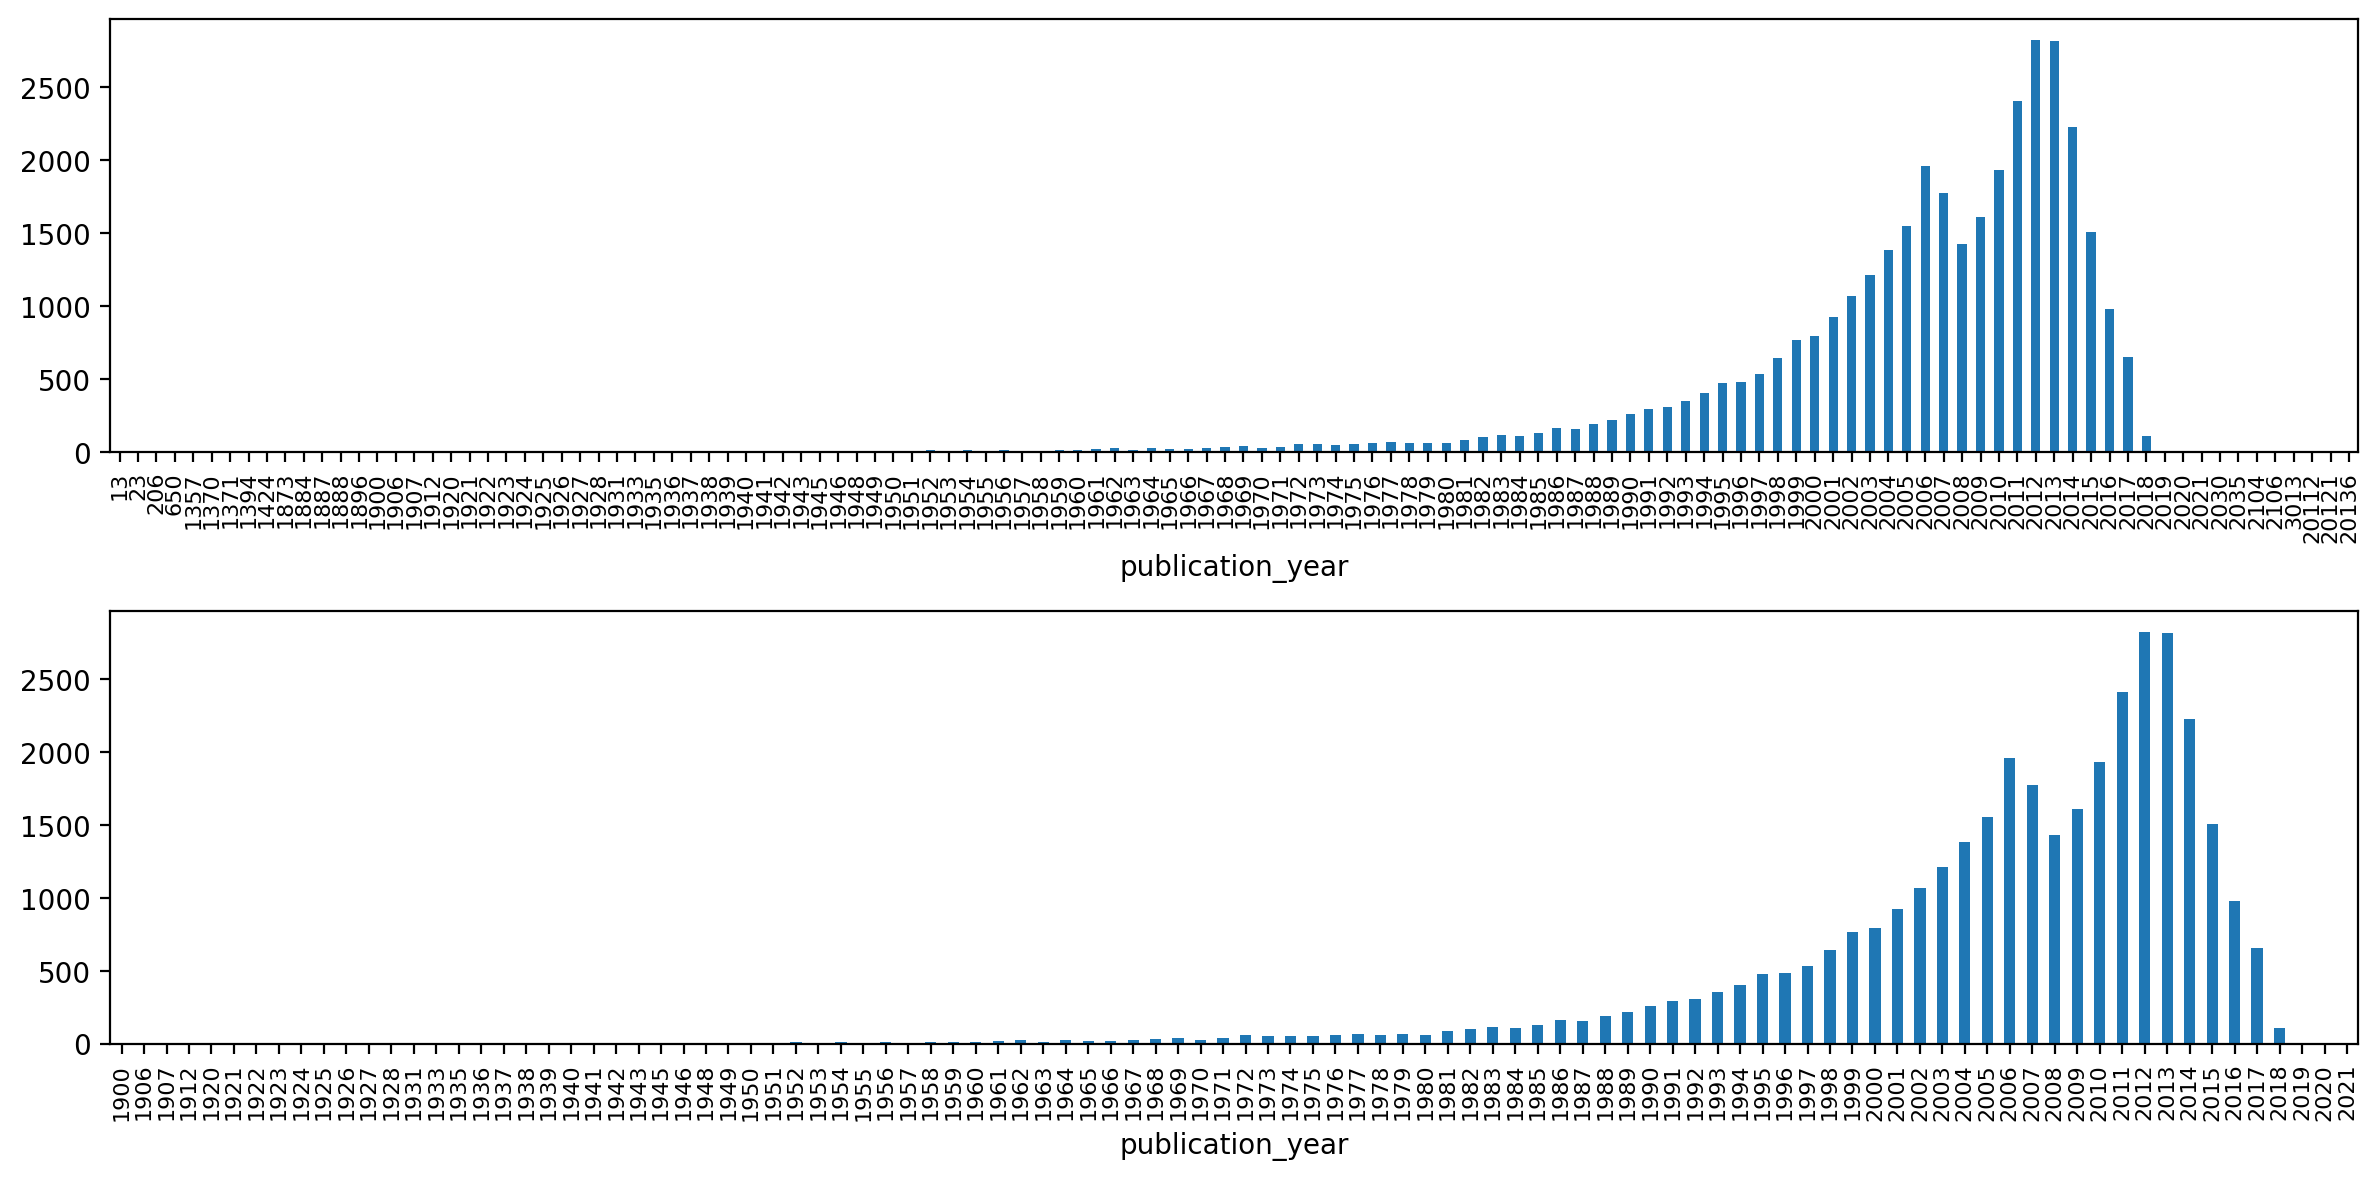

In [17]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [14]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [15]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [16]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


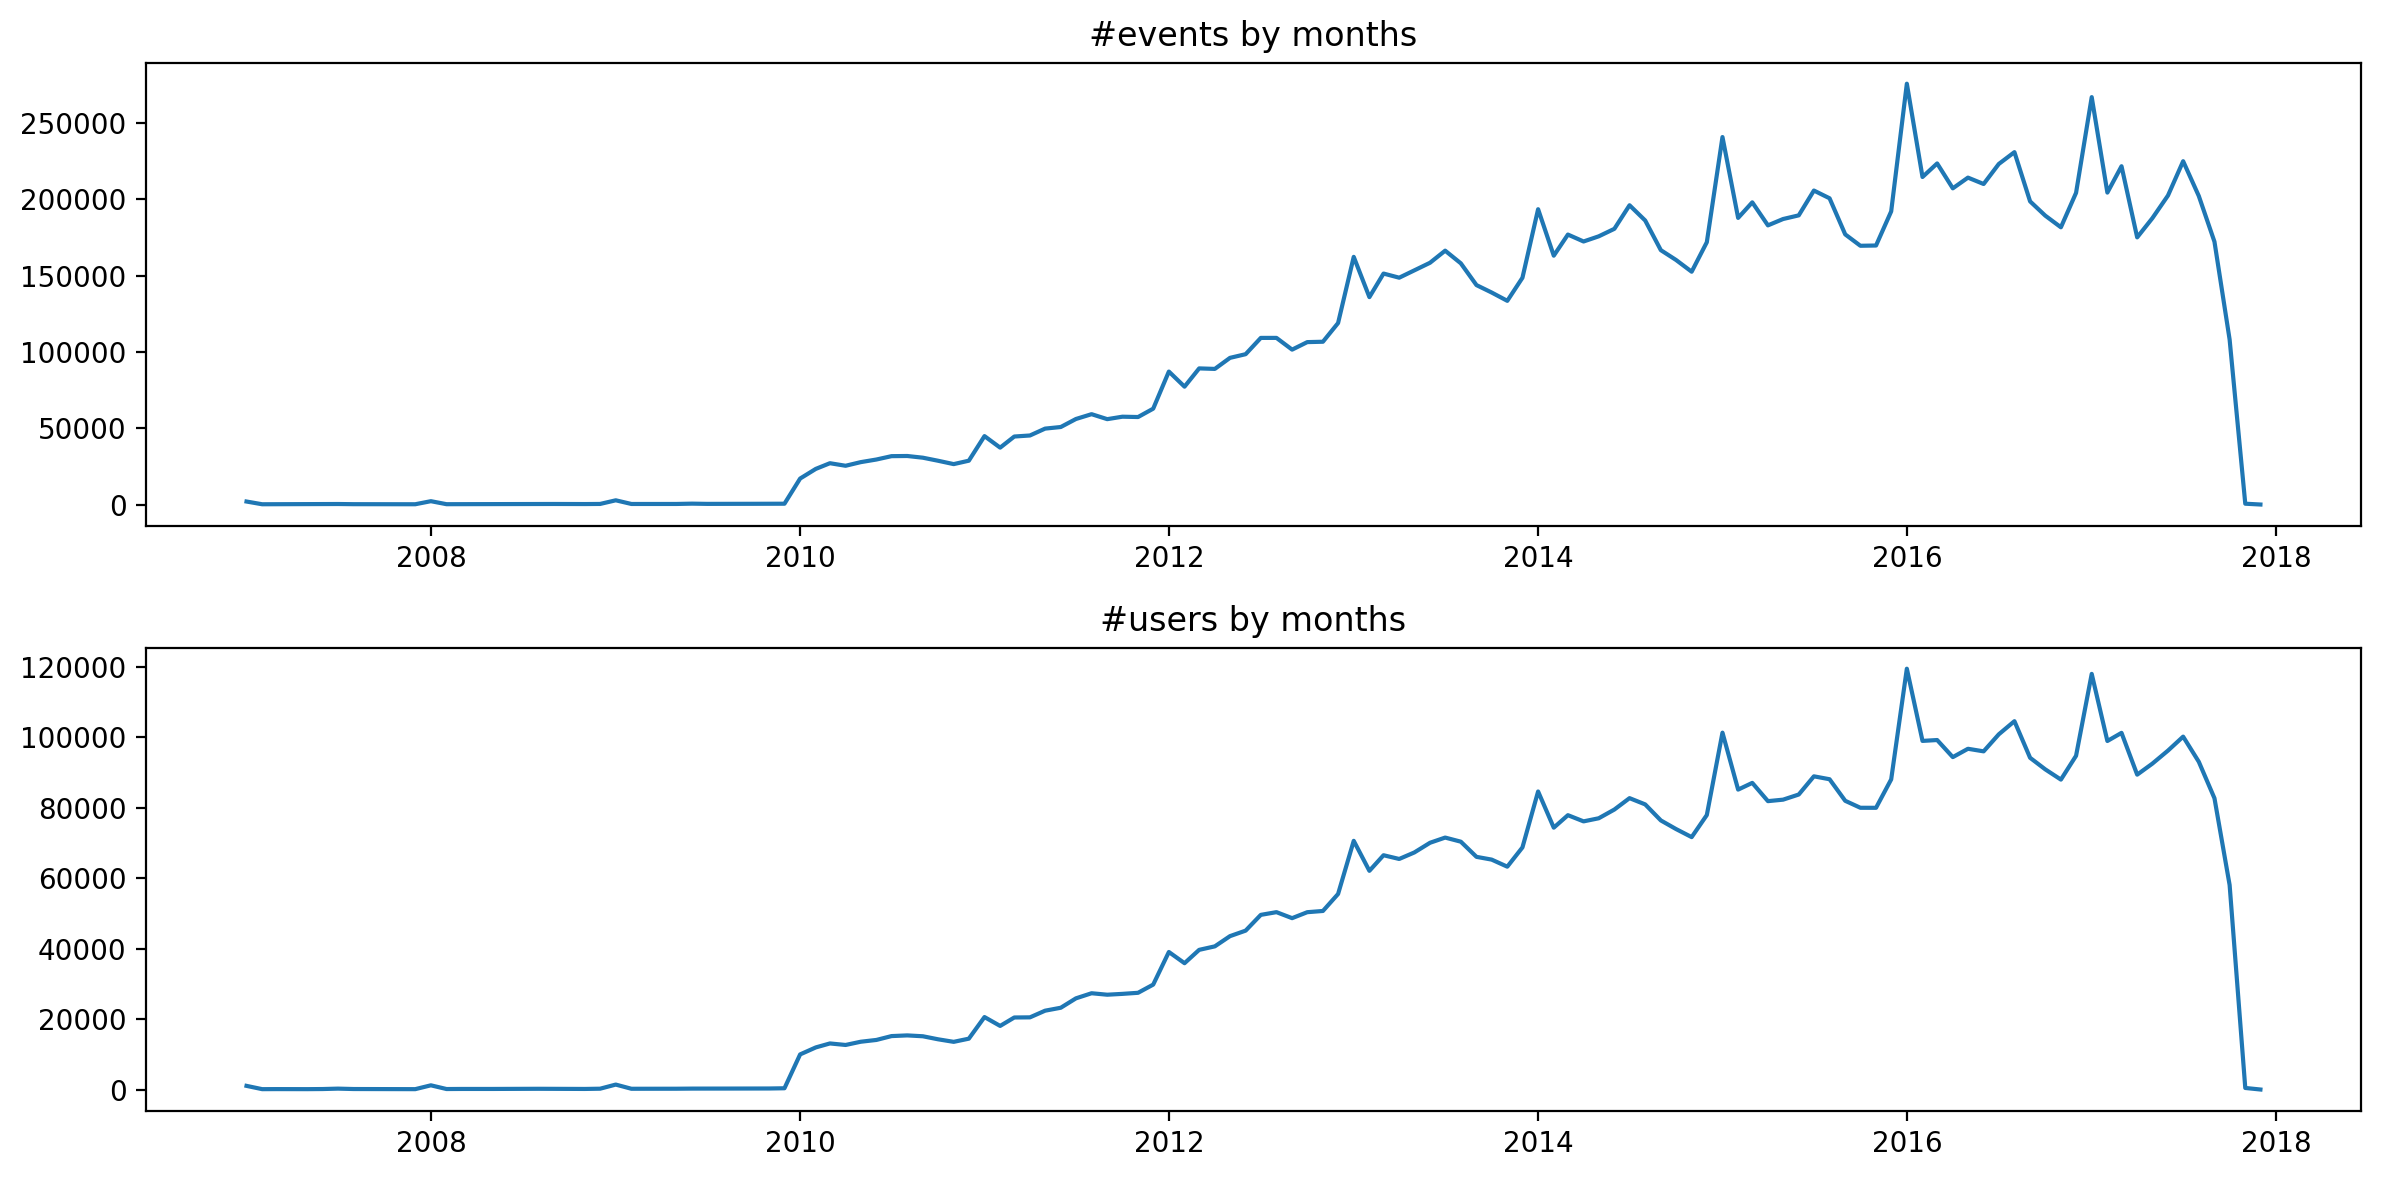

In [17]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

In [18]:
import time
import polars as pl

total_users = interactions["user_id"].nunique()
print(f"Всего пользователей: {total_users}")

start = time.time()
avg_books_per_user = interactions.groupby("user_id").agg(books=("book_id", "nunique")).reset_index().books.mean()
print(f"Среднее количество прочитанных книг на пользователя: {avg_books_per_user:.2f}")
elapsed = time.time() - start
print(f"Elapsed: {elapsed:.2f}")

start = time.time()
polars_interactions = pl.from_pandas(interactions)
polars_avg = (
    polars_interactions.group_by("user_id")
      .agg(pl.col("book_id").n_unique().alias("books"))
      .select(pl.col("books").mean())
      .item()
)
print(f"Среднее количество прочитанных книг на пользователя: {polars_avg:.2f}")
elapsed = time.time() - start
print(f"Elapsed: {elapsed:.2f}")

Всего пользователей: 542657
Среднее количество прочитанных книг на пользователя: 23.75
Elapsed: 3.66
Среднее количество прочитанных книг на пользователя: 23.75
Elapsed: 3.90


shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 663.0      │
│ null_count ┆ 0.0        │
│ mean       ┆ 359.482655 │
│ std        ┆ 262.266744 │
│ min        ┆ 1.0        │
│ 90%        ┆ 651.0      │
│ 95%        ┆ 797.0      │
│ 99%        ┆ 1087.0     │
│ max        ┆ 3204.0     │
└────────────┴────────────┘
shape: (5, 2)
┌───────┬───────┐
│ books ┆ count │
│ ---   ┆ ---   │
│ u32   ┆ u32   │
╞═══════╪═══════╡
│ 1     ┆ 85300 │
│ 2     ┆ 52620 │
│ 3     ┆ 38332 │
│ 4     ┆ 29336 │
│ 5     ┆ 23953 │
└───────┴───────┘


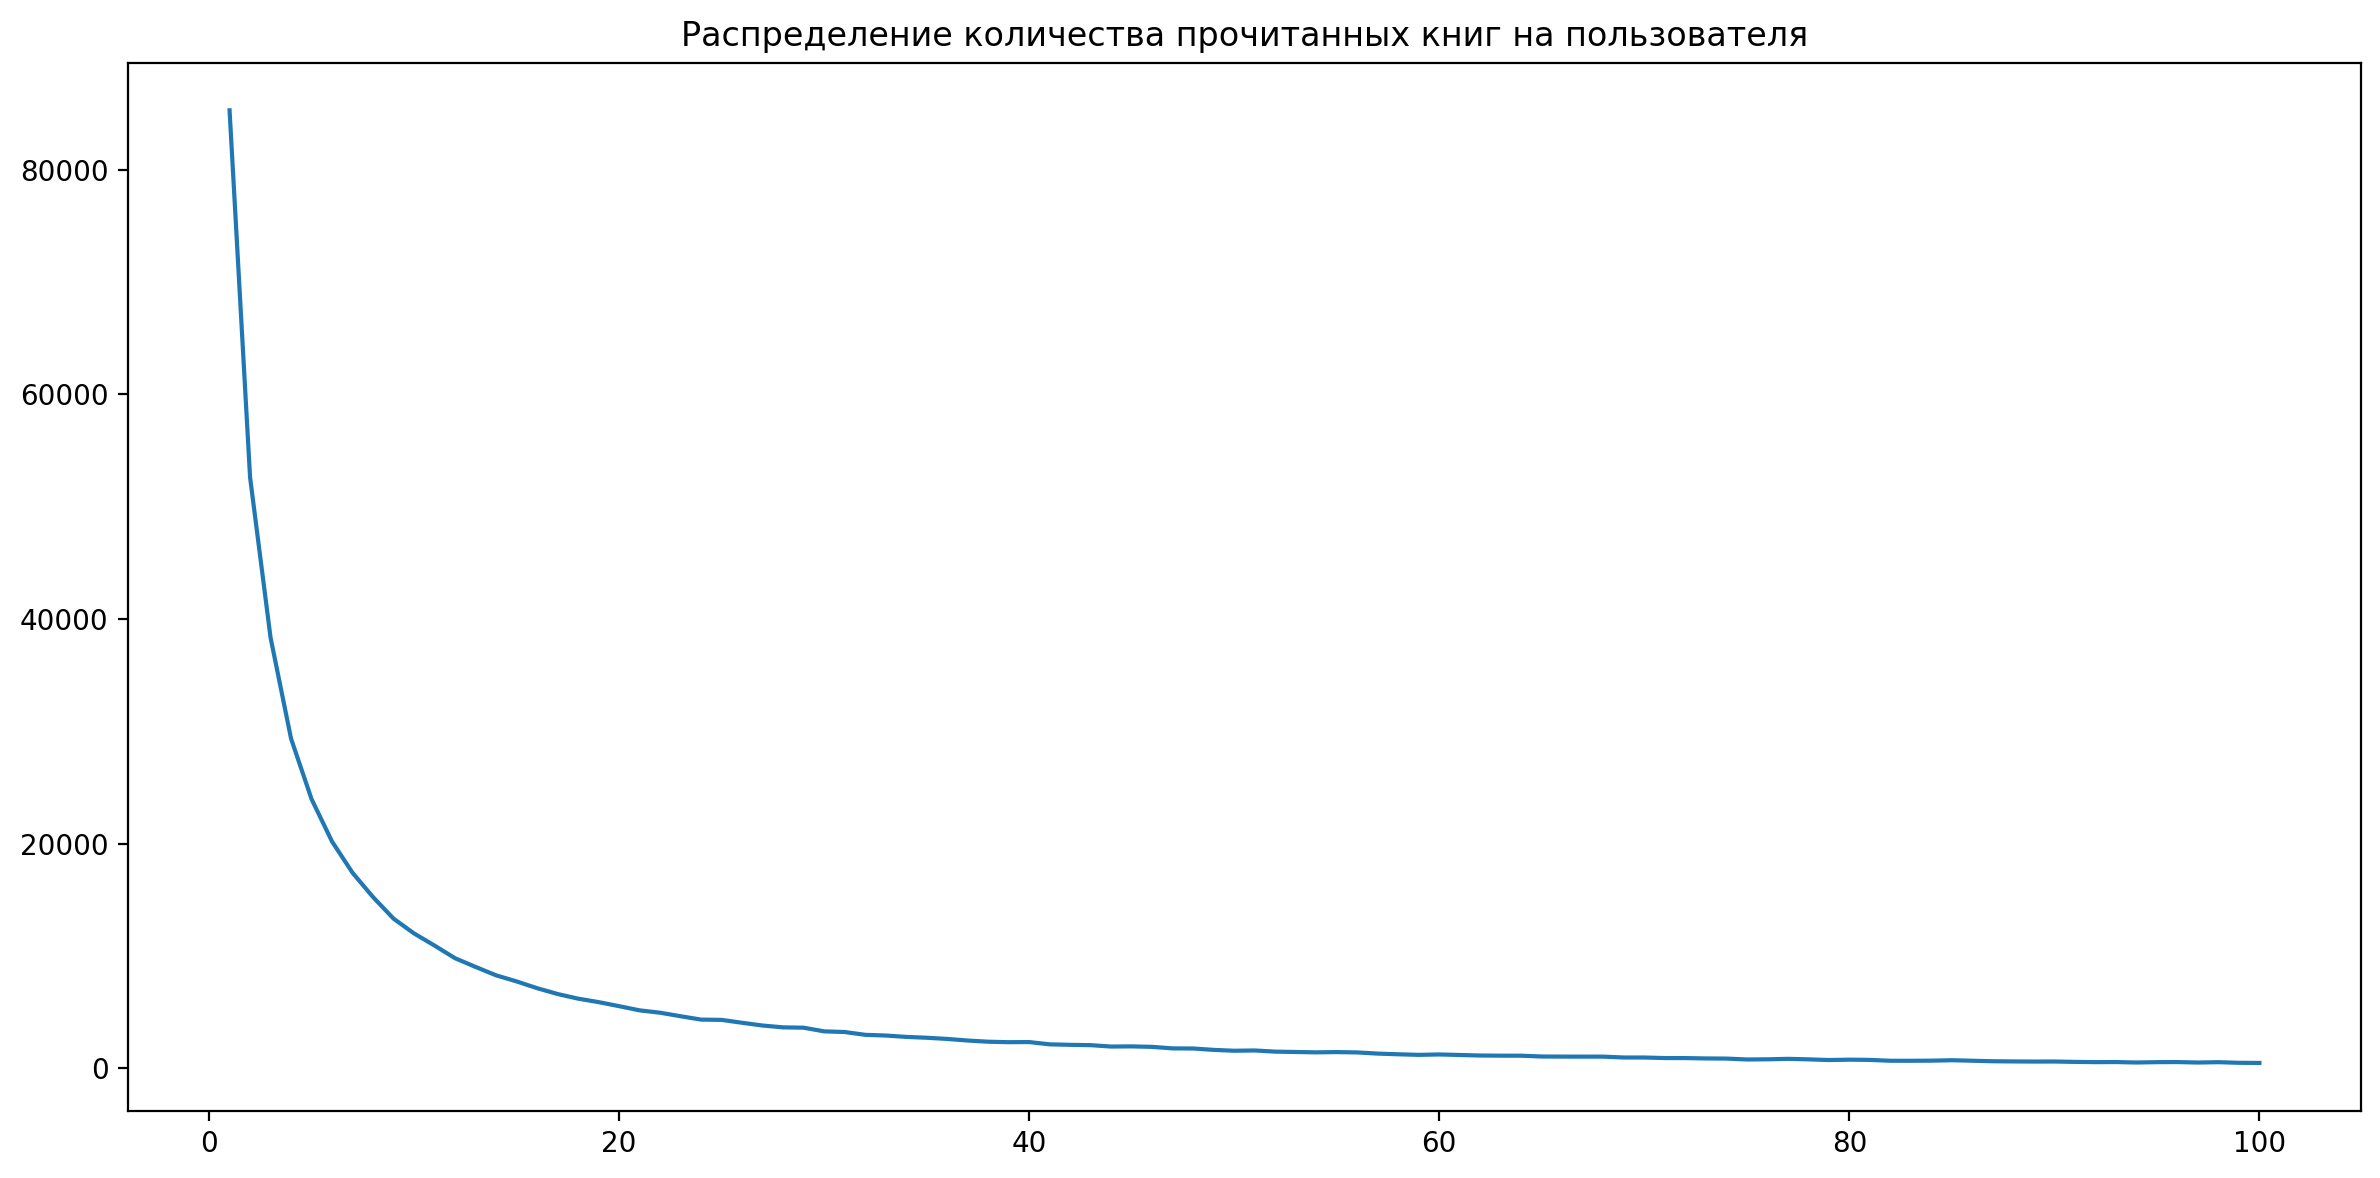

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_title("Распределение количества прочитанных книг на пользователя")

polars_books_per_user = polars_interactions.group_by("user_id").agg(pl.col("book_id").n_unique().alias("books"))
books_counts = polars_books_per_user["books"].value_counts().sort("books")
print(books_counts["books"].describe(percentiles=[.9, .95, .99]))
books_counts = books_counts.filter(pl.col("books") <= 100)
print(books_counts.head())
raw = books_counts.to_pandas()
ax.plot(raw["books"], raw["count"])

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [9]:
items = books.copy()
events = interactions.copy()
print(interactions.shape[0])

12890434


In [10]:
# del books
# del interactions

In [11]:
# оставим события только до ноября 2017
event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()
print(events.shape[0])

# Has rating and is read
print("Rating, not reviewed", len(events[(events["rating"] > 0) & (events["is_reviewed"] == False)]))
print("No rating, reviewed", len(events[(events["rating"] == 0) & (events["is_reviewed"] == True)]))
events = events[(events["rating"] > 0) & (events["is_read"] == True)] #  (events["is_reviewed"] == True)
print(events.shape[0])

# Filter out users with less than 2 events
user_events = events['user_id'].value_counts()
users_with_2_or_more = user_events[user_events >= 2].index
events = events[events['user_id'].isin(users_with_2_or_more)]
print(events.shape[0])

print(events.shape[0] / interactions.shape[0])

12887523
Rating, not reviewed 8840887
No rating, reviewed 52012
11836282
11751086
0.9116129061286843


In [12]:
# rename columns
items.rename(columns={"book_id": "item_id"}, inplace=True)
events.rename(columns={"book_id": "item_id"}, inplace=True)


In [13]:
# replace user_id with user_idx
user_ids = sorted(events["user_id"].unique())
user_id_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids, start=1_000_000)}
print(user_id_to_idx["8f50136afeb65c55cec7b3d306c24b03"])
events["user_idx"] = events["user_id"].map(user_id_to_idx)

1241243


# Сохранение результатов

In [74]:
items.to_parquet("./data/transformed/items.par")

In [75]:
events.to_parquet("./data/transformed/events.par")